In [1]:
#names file (C4.5 format) for car evaluation domain
#class values
    #unacc, acc, good, vgood

#attributes
#    buying:   vhigh, high, med, low.
#    maint:    vhigh, high, med, low.
#    doors:    2, 3, 4, 5more.
#    persons:  2, 4, more.
#    lug_boot: small, med, big.
#    safety:   low, med, high.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn import cross_validation as cv
# from sklearn.cross_validation import cross_val_score

from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.model_selection import GridSearchCV
import time

from IPython.display import Image, display
import pydotplus

In [3]:
#Check data type of each feature
def checkDataType(df):
    #ordinal, cardinal, continuous etc
    categorical = [var for var in df.columns if df[var].dtype=='O']    #It includes mixed type variables also
    numerical = [var for var in df.columns if df[var].dtype!='O']    #Discrete and continuous numeric variables
    return categorical, numerical

In [4]:
def enumerateCategorical(df, cols):
    for col in cols:
        labels= dict(list(enumerate(df[col].unique())))
        ordered_labels = dict(zip(labels.values(), labels.keys()))
        print(ordered_labels)
        df[col] = df[col].map(ordered_labels)
    #return df

In [5]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time.time()
    print(start)
    grid_search.fit(X,y)
    end = time.time()
    print(end)
    #top_params=grid_search.grid_scores_
    #top_params=grid_search.best_scores_
    top_params=grid_search.best_params_
    return top_params

In [6]:
cars = pd.read_csv('car.data.csv', skiprows=None, sep=',', header=None, names =['buying','maint','doors','persons','lug_boot','safety','class'])

In [7]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,4,med,high,unacc
freq,432,432,432,576,576,576,1210


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
for col in cars.columns:
    print(cars[col].value_counts(),'\n')

high     432
med      432
low      432
vhigh    432
Name: buying, dtype: int64 

high     432
med      432
low      432
vhigh    432
Name: maint, dtype: int64 

5more    432
3        432
4        432
2        432
Name: doors, dtype: int64 

4       576
more    576
2       576
Name: persons, dtype: int64 

med      576
big      576
small    576
Name: lug_boot, dtype: int64 

high    576
med     576
low     576
Name: safety, dtype: int64 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [11]:
dTypes = checkDataType(cars)
categorical= dTypes[0]
numerical= dTypes[1]

In [12]:
#df= cars.copy()
enumerateCategorical(cars,categorical)
cars.head()

{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
{'2': 0, '3': 1, '4': 2, '5more': 3}
{'2': 0, '4': 1, 'more': 2}
{'small': 0, 'med': 1, 'big': 2}
{'low': 0, 'med': 1, 'high': 2}
{'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [13]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


### Univariate Analysis

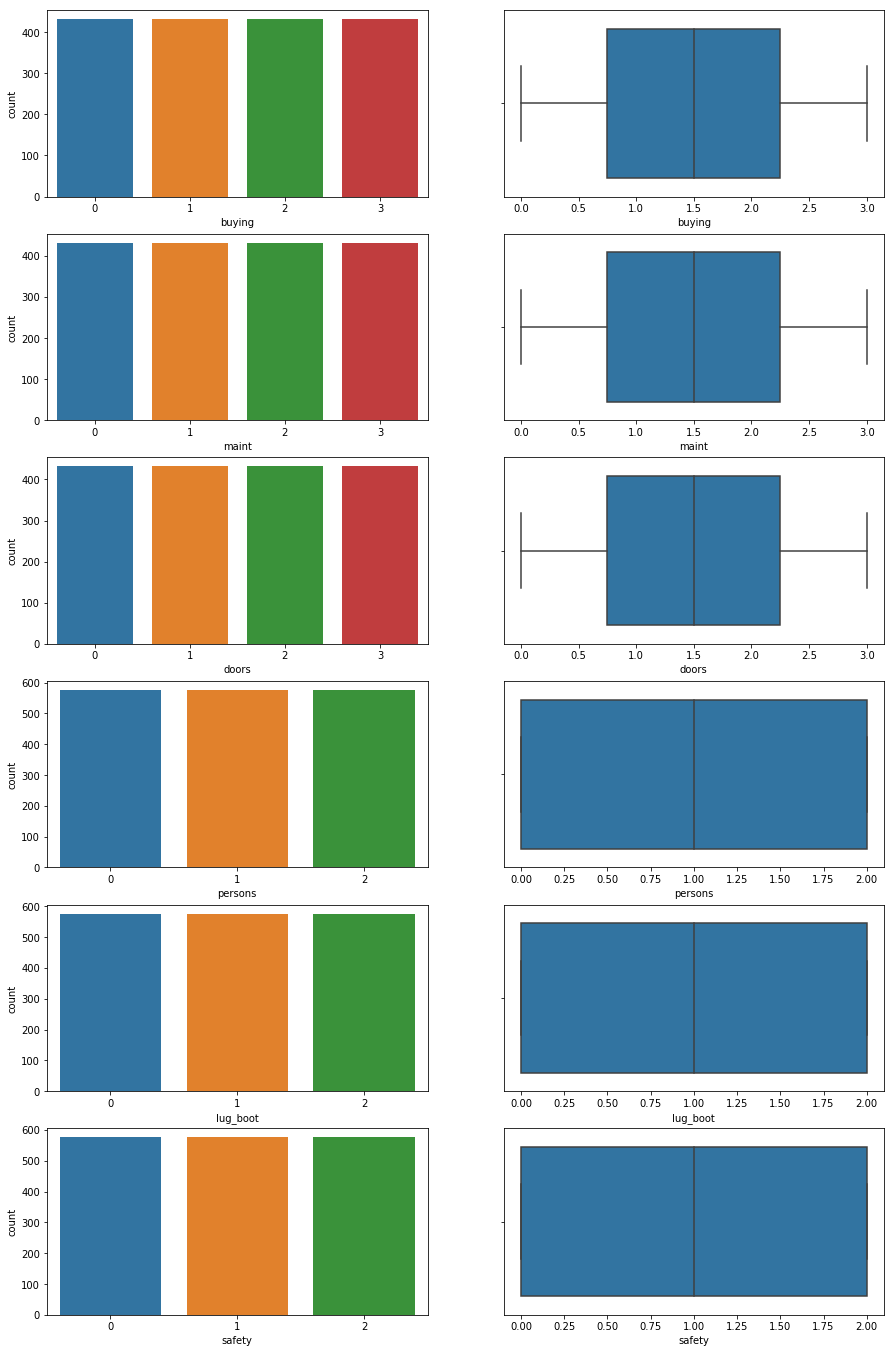

In [14]:
cols = cars.columns
nc = len(cols) -1 #dataframe has target column as well
fig, ax = plt.subplots(nrows=nc, ncols=2,figsize=(15,nc*4))
for i in range(nc):
    sns.countplot(cars[cols[i]],ax=ax[i,0])
    sns.boxplot(cars[cols[i]],ax=ax[i,1])

In [15]:
# the data is very balanced. Same no of records for each label
# no outliers present

### Bivariate Analysis

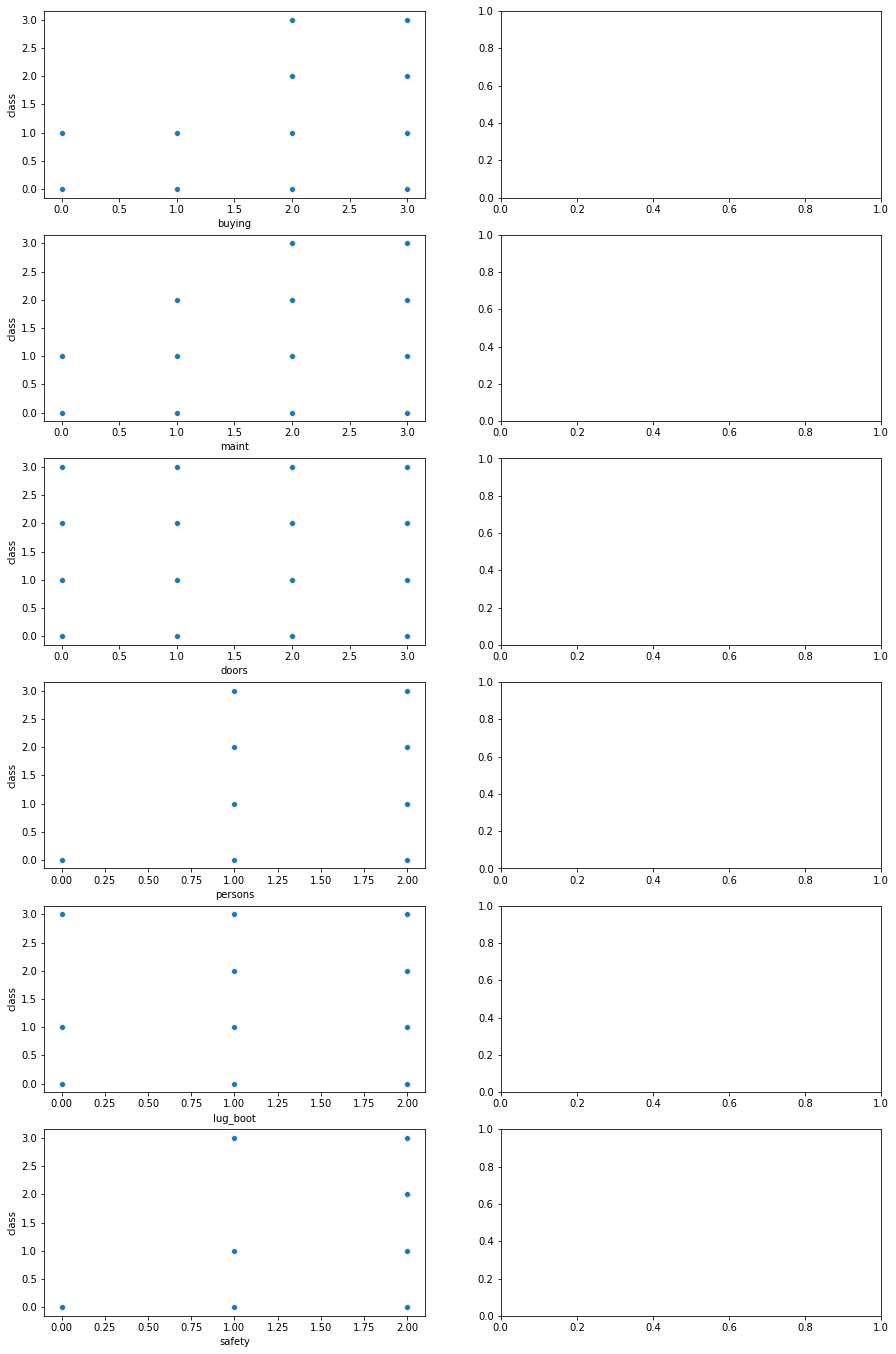

In [16]:
cols = cars.columns
nc = len(cols) -1 #dataframe has target column as well
fig, ax = plt.subplots(nrows=nc, ncols=2,figsize=(15,nc*4))
for i in range(nc):
    sns.scatterplot(cars[cols[i]],cars['class'],ax=ax[i,0])
    #sns.heatmap(cars[cols[i]],cars['class'],ax=ax[i,1])

In [17]:
X= cars[[col for col in cars.columns if col!='class']]
y= cars['class']

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9913294797687862


In [19]:
import pydotplus

In [21]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

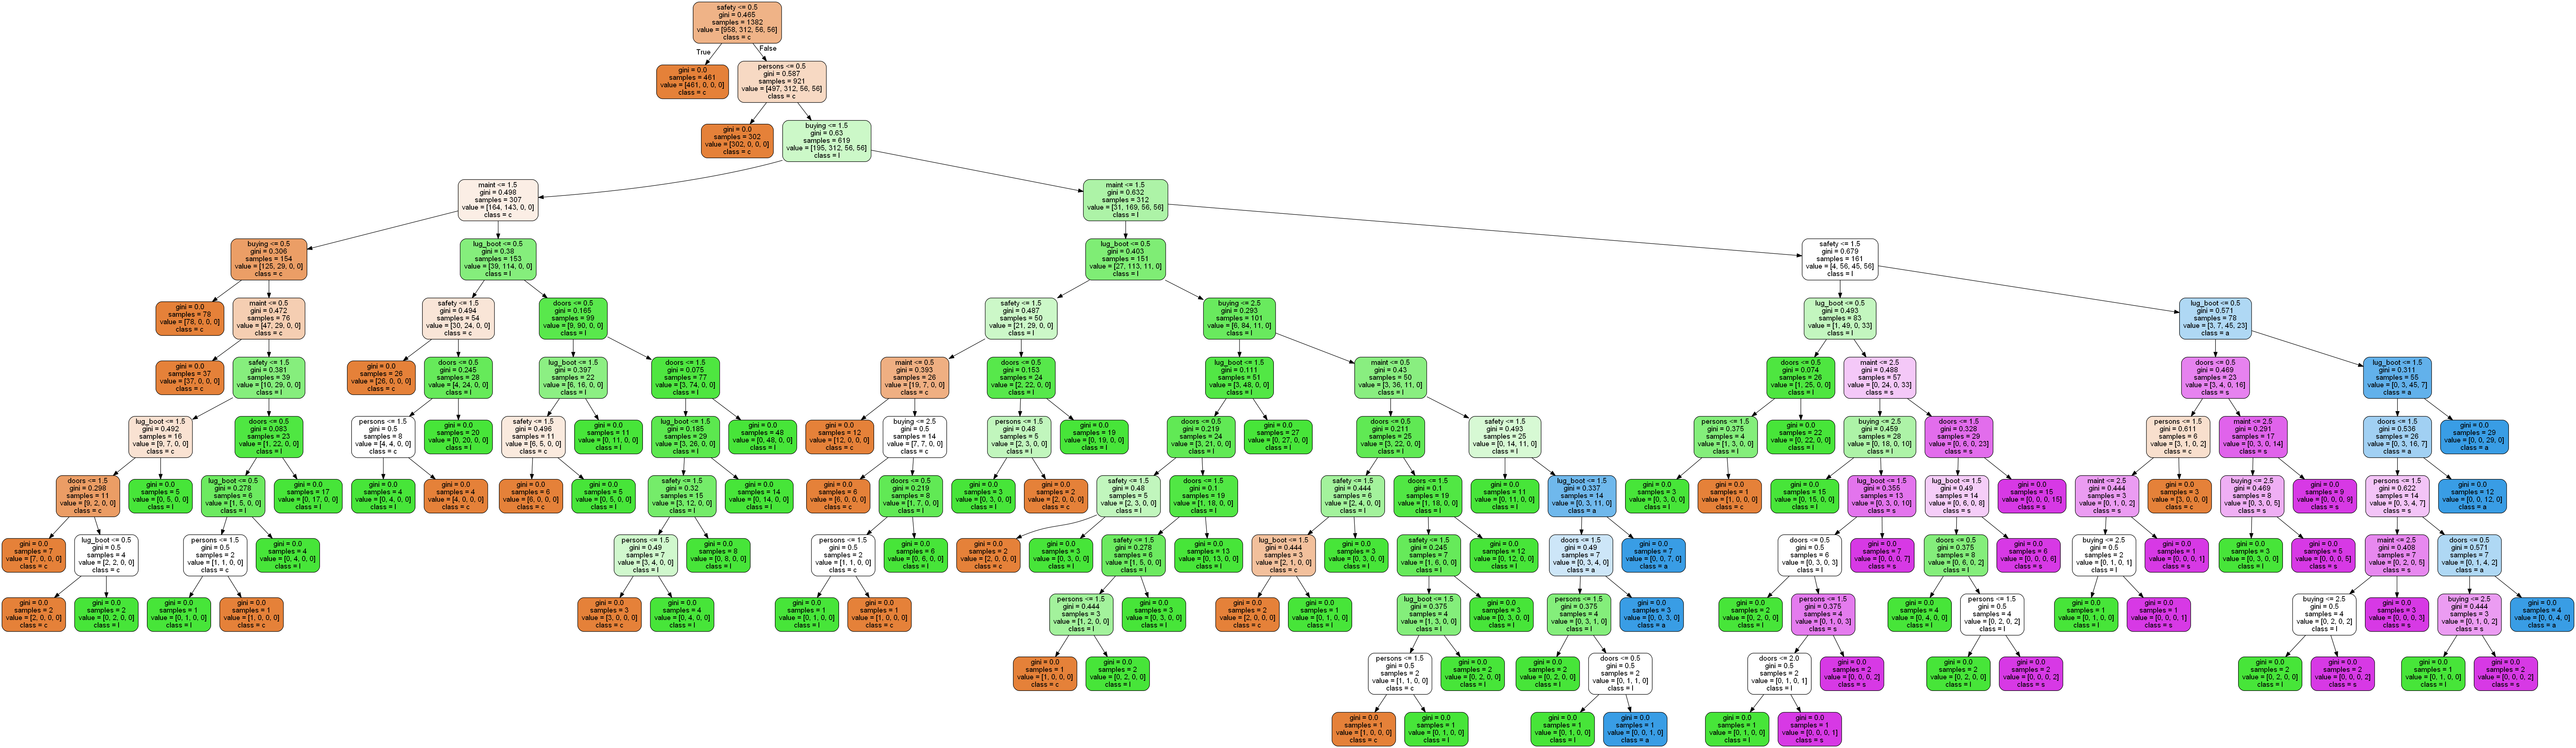

In [22]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names= X.columns, 
                                class_names= 'class')
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

### Find best parameters and tune the decision tree

In [23]:
param_grid1 = {'criterion':['gini','entropy'],
              'min_samples_split':[5,10,20],
              'max_depth':[2,5,7,10,15],
              'min_samples_leaf':[3,5,10] #minimum sample size required for leaf node
              }

top_param = GridSearch_BestParam(X_train, y_train, dt, param_grid1, cv=10)
top_param

1554239403.4642537
1554239408.6767492


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [24]:
dt1= tree.DecisionTreeClassifier(criterion=top_param['criterion'],
                                 max_depth=top_param['max_depth'],
                                 min_samples_leaf=top_param['min_samples_leaf'],
                                 min_samples_split= top_param['min_samples_split'])

dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.9855282199710564
0.9653179190751445


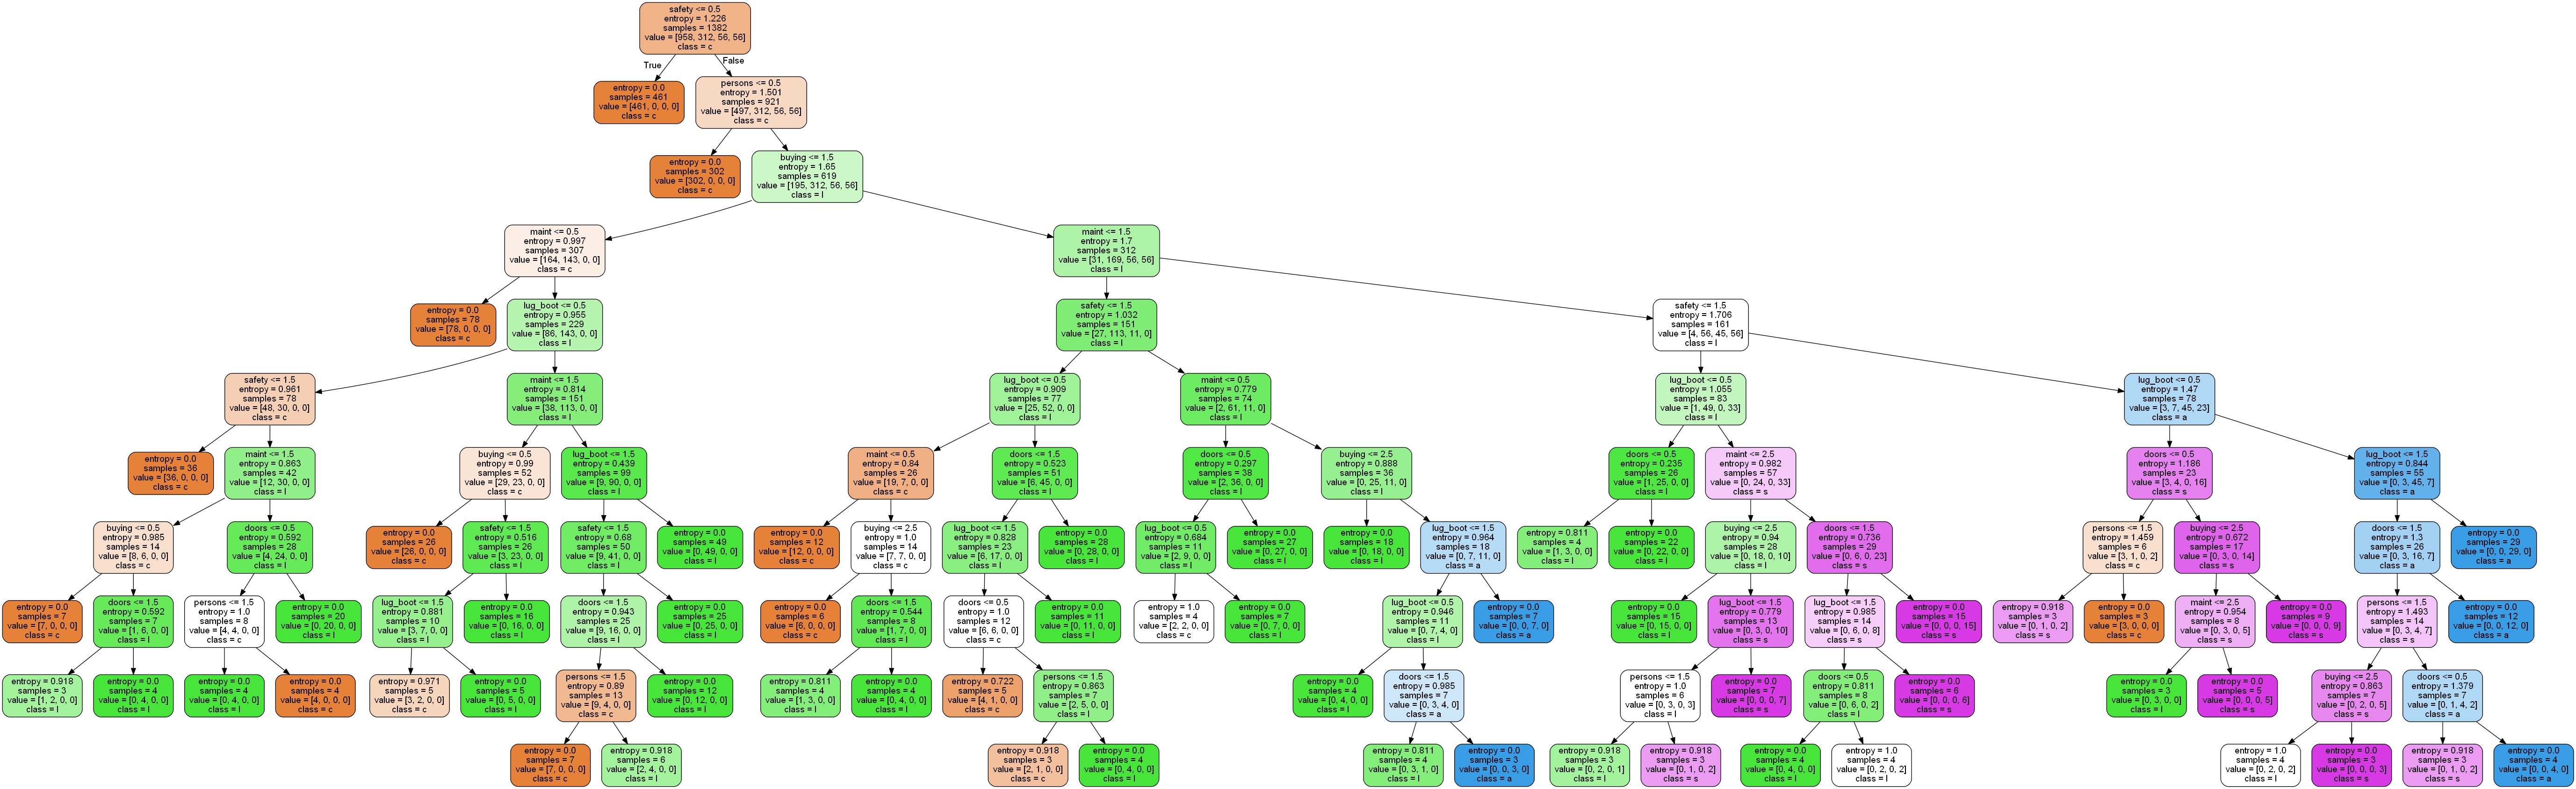

In [25]:
dot_data = tree.export_graphviz(dt1, out_file=None, filled=True, rounded=True, feature_names= X.columns, 
                                class_names= 'class')
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))